We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming 
category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. 
The client is particularly interested in customer segments and their chip purchasing behaviour

The Question 
- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
file_data = pd.ExcelFile("QVI_transaction_data.xlsx")

In [3]:
data_trans = pd.read_excel(file_data,'in')
data_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
data_purchase = pd.read_csv('QVI_purchase_behaviour.csv')
data_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Data Transaction

In [5]:
data_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
data_trans.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
import datetime as dt
from datetime import datetime

def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900,1,1).toordinal() + num -2)
    return dt

In [9]:
data_trans['DATE'] = data_trans['DATE'].apply(convert_to_datetime)

In [10]:
data_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [38]:
data_trans.TOT_SALES.unique()

array([  6.  ,   6.3 ,   2.9 ,  15.  ,  13.8 ,   5.1 ,   5.7 ,   3.6 ,
         3.9 ,   7.2 ,  23.  ,   9.2 ,   1.7 ,   3.3 ,   2.1 ,   3.  ,
         3.8 ,   5.4 ,   2.7 ,   3.7 ,  14.8 ,   4.4 ,   6.6 ,   2.6 ,
         3.25,   4.6 ,   5.8 ,  15.5 ,   7.8 ,   4.2 ,   7.4 ,   7.6 ,
         8.4 ,   6.5 ,   4.3 ,  28.5 ,   7.5 ,   3.4 ,  19.  ,  11.8 ,
        17.6 ,   9.  ,  13.2 ,   1.9 ,  10.2 ,  13.  ,  15.2 ,  11.4 ,
        14.5 ,   5.6 ,  10.8 ,  10.4 ,   1.5 ,  16.5 ,   1.8 ,   5.2 ,
         5.9 ,  18.4 ,   8.8 ,  18.5 ,   6.2 ,   4.8 ,   8.6 ,   2.8 ,
         2.3 ,   3.1 ,   2.4 ,  15.6 ,  19.5 ,  27.  ,   9.9 ,  16.2 ,
        13.5 ,  21.6 ,  23.6 ,  29.5 ,  12.6 ,   8.1 ,  15.3 ,  11.1 ,
        22.  ,   9.5 ,  16.25,  20.4 ,  11.7 ,  22.8 ,   9.6 ,   8.5 ,
        10.5 ,  21.  ,  12.  ,  14.4 ,   9.75,  16.8 ,  25.5 ,  17.7 ,
        17.2 ,  17.1 ,   4.5 ,   6.8 ,  18.  ,  12.9 ,  11.5 ,   8.7 ,
        14.  ,  11.6 ,  12.4 , 650.  ,  21.5 ,   9.3 ,  11.2 ,   6.9 ])

In [42]:
# calculate z-score
z_scores = (data_trans['TOT_SALES'] -data_trans['TOT_SALES'].mean()) / data_trans['TOT_SALES'].std()

# drop rows with z-score > 2 or < -2
df_trans = data_trans.drop(data_trans[(z_scores > 2) | (z_scores < -2)].index)

print(df_trans)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
5      2019-05-19          4            4074    2982        57   
6      2019-05-16          4            4149    3333        16   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [41]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [46]:
data_trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [44]:
df_trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264124.000000,2.641240e+05,2.641240e+05,264124.000000,264124.000000,264124.000000
mean,135.072277,1.355424e+05,1.351508e+05,56.591355,1.899199,7.268766
std,76.785574,8.059134e+04,7.813468e+04,32.822100,0.316993,2.452078
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.001900e+04,6.759250e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303540e+05,1.351255e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030930e+05,2.026942e+05,85.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,13.200000


### Data Purchase

In [12]:
data_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
data_purchase.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [14]:
data_purchase.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [15]:
data_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## EDA & VISUALIZATION

In [47]:
data_trans_purchase = df_trans.merge(data_purchase, on='LYLTY_CARD_NBR', how='inner')

In [48]:
data_trans_purchase.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [49]:
data_trans_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264124 entries, 0 to 264123
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264124 non-null  datetime64[ns]
 1   STORE_NBR         264124 non-null  int64         
 2   LYLTY_CARD_NBR    264124 non-null  int64         
 3   TXN_ID            264124 non-null  int64         
 4   PROD_NBR          264124 non-null  int64         
 5   PROD_NAME         264124 non-null  object        
 6   PROD_QTY          264124 non-null  int64         
 7   TOT_SALES         264124 non-null  float64       
 8   LIFESTAGE         264124 non-null  object        
 9   PREMIUM_CUSTOMER  264124 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'PREMIUM CUSTOMER BY LIFESTAGE')]

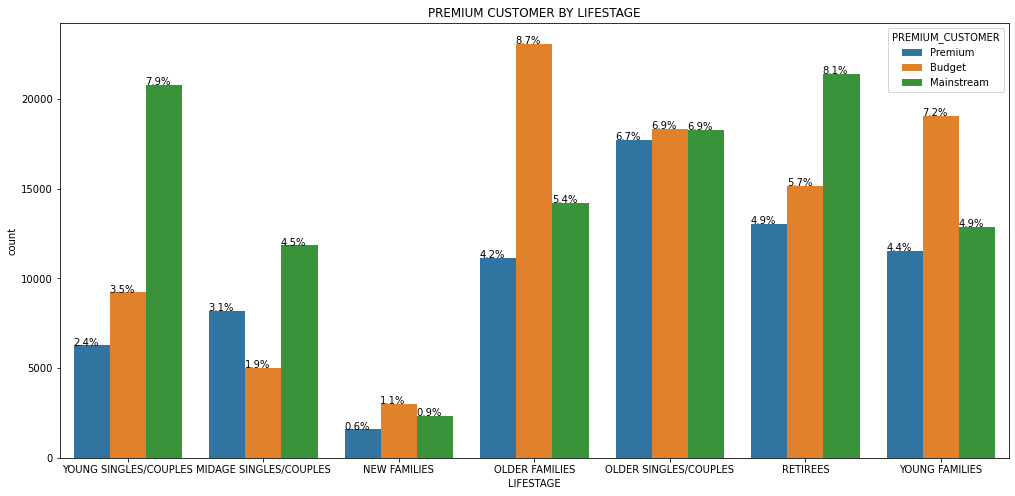

In [50]:

plt.figure(figsize=(17,8))
ax = sns.countplot(data_trans_purchase.LIFESTAGE, hue=data_trans_purchase.PREMIUM_CUSTOMER)

# loop through each bar and add the percentage label
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 3.,
            height + 4,
            '{:2.1f}%'.format(height / data_trans_purchase.LIFESTAGE.value_counts().sum() * 100),
            ha="center")

ax.set(title='PREMIUM CUSTOMER BY LIFESTAGE')

**the highest premium customer is budget in older families**

In [51]:
 pd.crosstab(data_trans_purchase.LIFESTAGE, data_trans_purchase.PREMIUM_CUSTOMER,margins=True)

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,All
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,5006,11839,8198,25043
NEW FAMILIES,3001,2321,1587,6909
OLDER FAMILIES,23095,14192,11152,48439
OLDER SINGLES/COUPLES,18350,18270,17705,54325
RETIREES,15156,21423,13064,49643
YOUNG FAMILIES,19063,12864,11533,43460
YOUNG SINGLES/COUPLES,9226,20808,6271,36305
All,92897,101717,69510,264124


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, ' LIFESTAGE')]

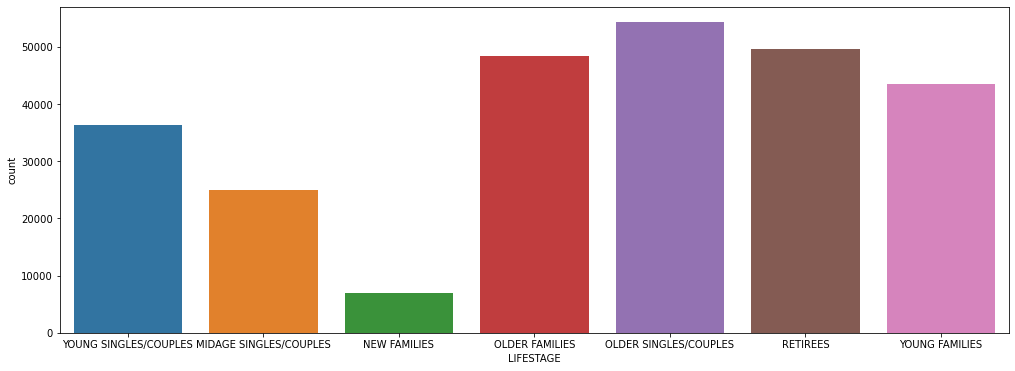

In [52]:
plt.figure(figsize=(17,6))
sns.countplot(data_trans_purchase['LIFESTAGE'])

ax.set(title=' LIFESTAGE')

In [53]:
data_trans_purchase.LIFESTAGE.describe()

count                    264124
unique                        7
top       OLDER SINGLES/COUPLES
freq                      54325
Name: LIFESTAGE, dtype: object

**the highest lifestage is older singles/couples**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, ' PREMIUM CUSTOMER')]

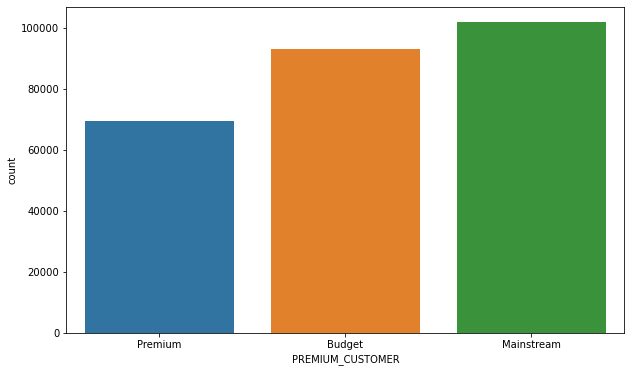

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data_trans_purchase['PREMIUM_CUSTOMER'])

ax.set(title=' PREMIUM CUSTOMER')

In [55]:
data_trans_purchase.PREMIUM_CUSTOMER.describe()

count         264124
unique             3
top       Mainstream
freq          101717
Name: PREMIUM_CUSTOMER, dtype: object

**the highest premium customer is mainstream**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

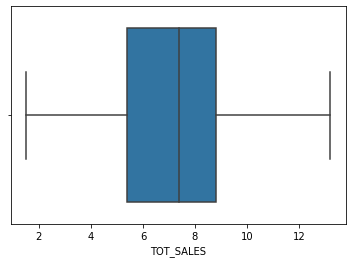

In [59]:
sns.boxplot(df_trans['TOT_SALES'])

In [60]:
data_trans_purchase.TOT_SALES.describe()

count    264124.000000
mean          7.268766
std           2.452078
min           1.500000
25%           5.400000
50%           7.400000
75%           8.800000
max          13.200000
Name: TOT_SALES, dtype: float64

**there's no outlier**

In [61]:
data_trans_purchase.PROD_NAME.describe()

count                                     264124
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3280
Name: PROD_NAME, dtype: object

In [62]:
data_trans_purchase.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget


## EXTRACT TO CSV

In [63]:
data_trans_purchase.to_csv('clean_data_QVI.csv', index=False)